# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex1data2.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [3]:
data

size  nb_bedrooms   price
0   2104            3  399900
1   1600            3  329900
2   2400            3  369000
3   1416            2  232000
4   3000            4  539900
5   1985            4  299900
6   1534            3  314900
7   1427            3  198999
8   1380            3  212000
9   1494            3  242500
10  1940            4  239999
11  2000            3  347000
12  1890            3  329999
13  4478            5  699900
14  1268            3  259900
15  2300            4  449900
16  1320            2  299900
17  1236            3  199900
18  2609            4  499998
19  3031            4  599000
20  1767            3  252900
21  1888            2  255000
22  1604            3  242900
23  1962            4  259900
24  3890            3  573900
25  1100            3  249900
26  1458            3  464500
27  2526            3  469000
28  2200            3  475000
29  2637            3  299900
30  1839            2  349900
31  1000            1  169900
32  2040            4  314900
33  3137            3  579900
34  1811            4  285900
35  1437            3  249900
36  1239            3  229900
37  2132            4  345000
38  4215            4  549000
39  2162            4  287000
40  1664            2  368500
41  2238            3  329900
42  2567            4  314000
43  1200            3  299000
44   852            2  179900
45  1852            4  299900
46  1203            3  239500

## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [4]:
X = data[["size", "nb_bedrooms"]].values
y = data["price"].values

### Initialisez theta (combien de dimensions?)

In [5]:
#theta has one more dimension than X features
theta = np.zeros(X.shape[1] + 1)

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

In [6]:
theta.shape

(3,)

In [7]:
X.shape

(47, 2)

### Modifiez X en conséquence

In [8]:
#As theta have one more dimension we need to add to X a column of 1 before the first column
X = np.c_[np.ones(X.shape[0]), X]

## Écrivez une fonction pour normaliser les features

In [9]:
def featureNormalize(X):
    mean = np.mean(X, axis=0)
    stdev = np.std(X, axis=0)
    X = (X - mean) / stdev
    return X, mean, stdev

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [10]:
#X is a feature row
def predict(X, theta):
    return (np.dot(theta.T, X))

In [11]:
def cost(X, y, theta):
    m = X.shape[0]
    return (1/(2 * m)) * sum((predict(X[i], theta) - y[i]) ** 2 for i in range(m))

In [12]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m, n = X.shape
    tmp_theta = np.zeros(theta.size)
    J_history = []
    
    for i in range(num_iters):
        J_history.append(cost(X, y, theta))
        #for each feature column...
        for j in range(n):
            tmp_theta[j] = theta[j] - ((alpha / m) * sum((predict(X[k], theta) - y[k]) * X[k][j] for k in range(m)))
        theta = tmp_theta
            
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [13]:
# I'm doing initialization of the dataset here because during test it was more convenient
# to have all those steps in one and only cell

#Transform the panda dataframe into numpy narray
X = data[["size", "nb_bedrooms"]].values
y = data["price"].values

#Init theta to zero
theta = np.zeros(X.shape[1] + 1)

#normalize the training dataset
X, x_mean, x_stdev = featureNormalize(X)

#Add a column of 1 before the first column
X = np.c_[np.ones(X.shape[0]), X]

In [14]:
theta, J_history = fit_with_cost(X, y, theta, 0.01, 1500)

## Visualisez l'évolution du coût (graphe de convergence)

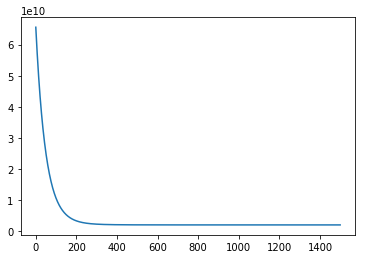

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [16]:
#prediction features needs to be normalized too...
house_features = [1, (1650 - x_mean[0]) / x_stdev[0], (3 - x_mean[1]) / x_stdev[1]]

In [17]:
predict(house_features, theta)

293098.15011431178